In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\karth\OneDrive\Documents\Artificial Intelligence Course Materials\Self Exploration Projects\Violence against Women\Violence Against Women Database.csv")

In [3]:
df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


In [5]:
df.describe()

,RecordID,Value
count,12600.000000,11187.000000
mean,210.500000,19.762537
std,121.248024,16.986437
min,1.000000,0.000000
25%,105.750000,6.200000
50%,210.500000,14.900000
75%,315.250000,29.200000
max,420.000000,86.900000


Trends in Attitudes Over Time

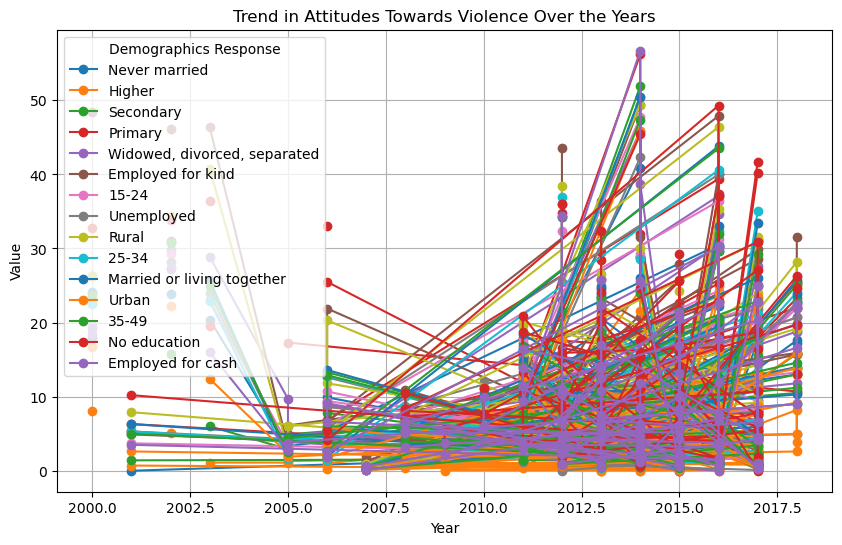

In [6]:
# Convert 'Survey Year' to datetime
df['Survey Year'] = pd.to_datetime(df['Survey Year'], format='%d/%m/%Y')

# Extract the year
df['Year'] = df['Survey Year'].dt.year

# Filter data for a specific question (e.g., "... if she burns the food")
question_filter = df['Question'] == "... if she burns the food"
filtered_df = df[question_filter]

# Plotting the trend of attitudes over the years
plt.figure(figsize=(10, 6))
for response in filtered_df['Demographics Response'].unique():
    subset = filtered_df[filtered_df['Demographics Response'] == response]
    plt.plot(subset['Year'], subset['Value'], marker='o', label=response)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trend in Attitudes Towards Violence Over the Years')
plt.legend(title='Demographics Response')
plt.grid(True)
plt.show()

Correlation Between Demographics and Attitudes

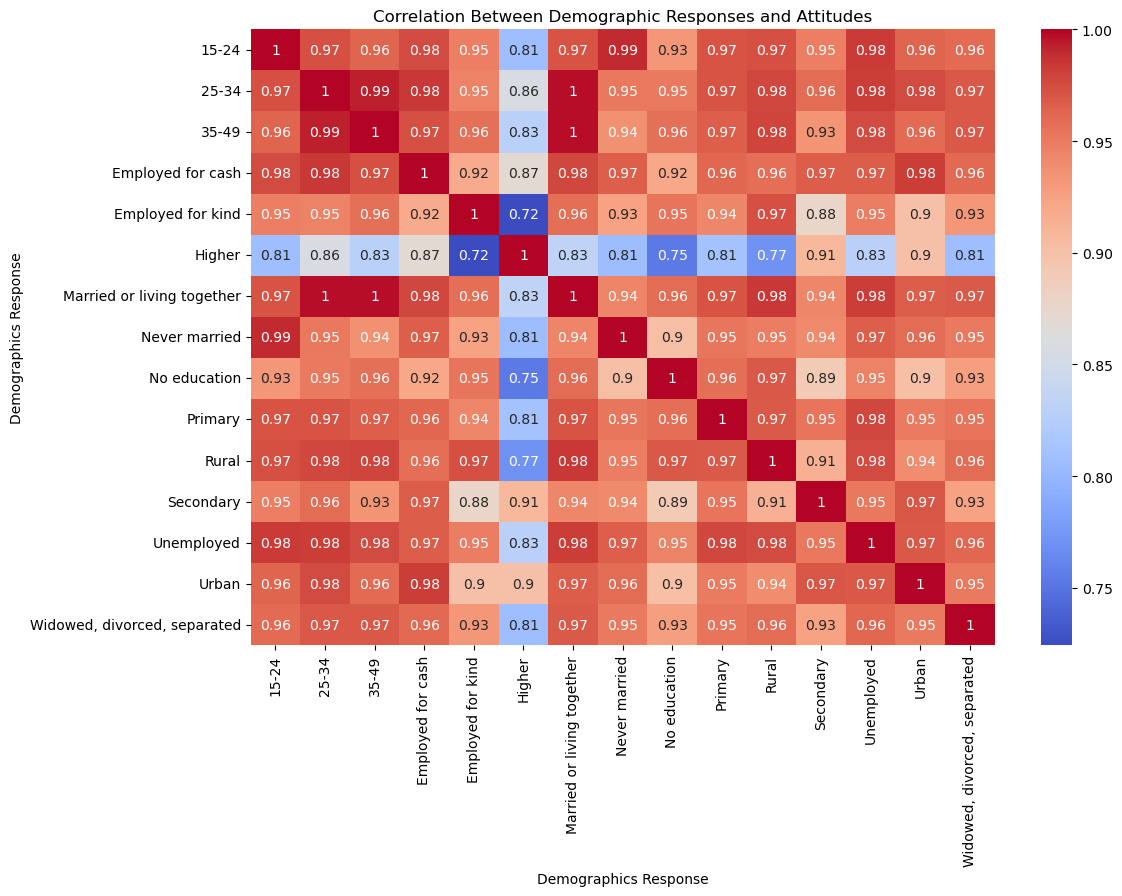

In [9]:
# Pivoting the data for correlation analysis
pivot_table = df.pivot_table(values='Value', index=['RecordID', 'Country', 'Question', 'Survey Year'], columns='Demographics Response')

# Calculating the correlation matrix
correlation_matrix = pivot_table.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Demographic Responses and Attitudes')
plt.show()

Gender-Specific Attitudes

<Figure size 1000x600 with 0 Axes>

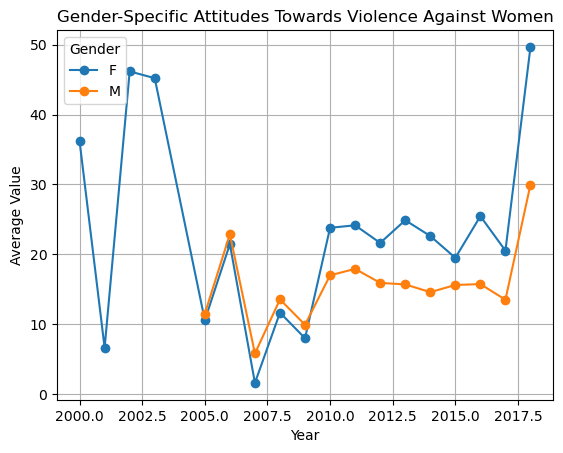

In [10]:
# Filtering data for gender comparison
gender_filter = df['Gender'].isin(['M', 'F'])
filtered_df = df[gender_filter]

# Aggregating data by gender and year
gender_agg = filtered_df.groupby(['Gender', 'Year'])['Value'].mean().unstack()

# Plotting gender-specific attitudes
plt.figure(figsize=(10, 6))
gender_agg.T.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Gender-Specific Attitudes Towards Violence Against Women')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

Impact of Marital Status on Attitudes

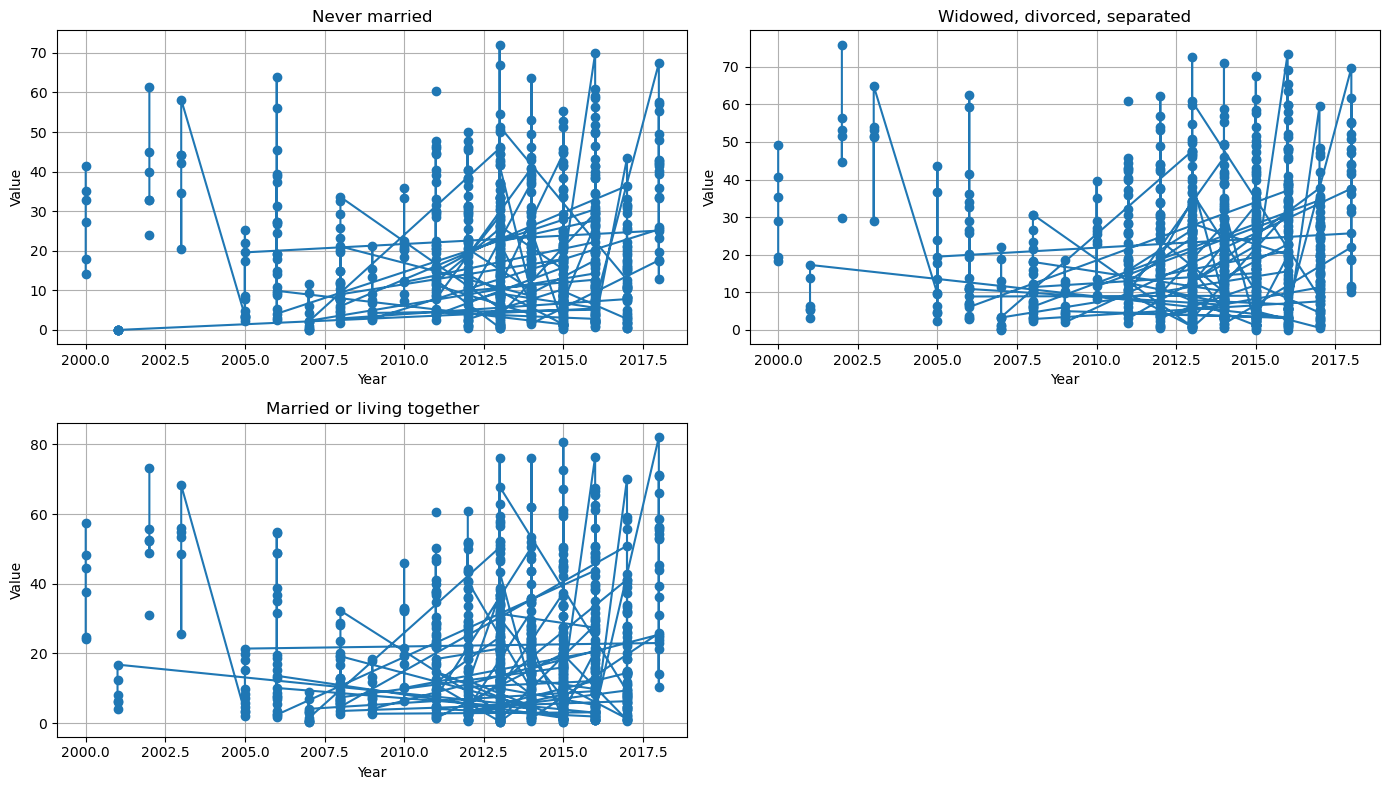

In [11]:
# Filter data for marital status
marital_status_filter = df['Demographics Question'] == 'Marital status'
filtered_df = df[marital_status_filter]

# Plotting the impact of marital status on attitudes
plt.figure(figsize=(14, 8))
marital_statuses = filtered_df['Demographics Response'].unique()

for i, status in enumerate(marital_statuses):
    plt.subplot(2, (len(marital_statuses)+1)//2, i+1)
    status_data = filtered_df[filtered_df['Demographics Response'] == status]
    plt.plot(status_data['Year'], status_data['Value'], marker='o')
    plt.title(status)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)

plt.tight_layout()
plt.show()

Attitudes Towards Different Reasons for Violence

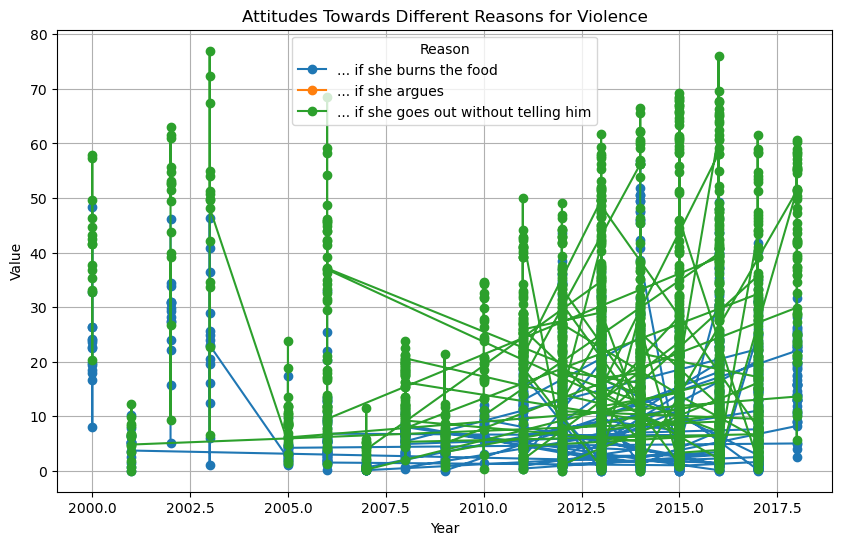

In [14]:
# Filtering data for specific questions (e.g., reasons for violence)
reasons = ["... if she burns the food", "... if she argues", "... if she goes out without telling him"]
reason_filter = df['Question'].isin(reasons)
filtered_df = df[reason_filter]

# Plotting the attitudes towards different reasons
plt.figure(figsize=(10, 6))
for reason in reasons:
    reason_data = filtered_df[filtered_df['Question'] == reason]
    plt.plot(reason_data['Year'], reason_data['Value'], marker='o', label=reason)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Attitudes Towards Different Reasons for Violence')
plt.legend(title='Reason')
plt.grid(True)
plt.show()

Correlation Between Different Reasons for Violence

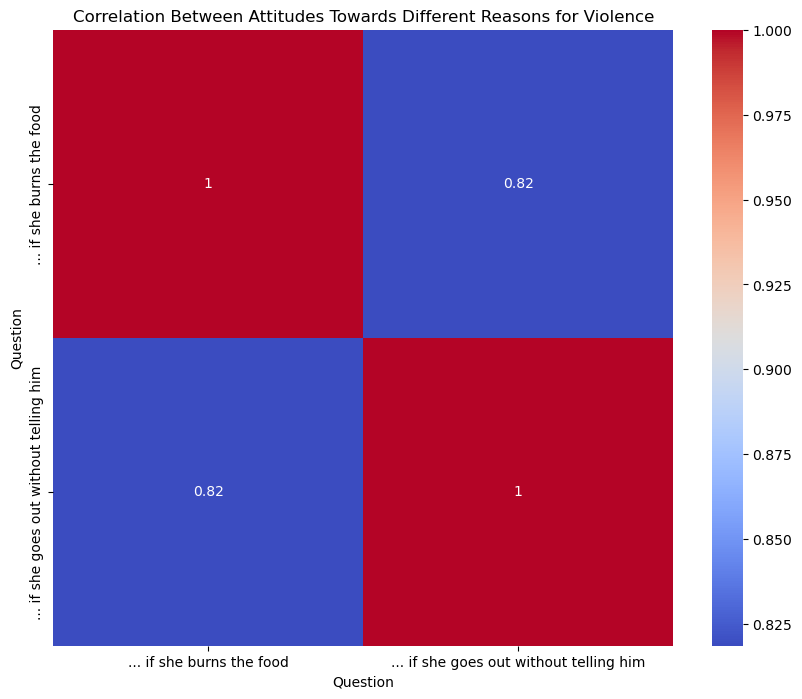

In [16]:
# Filtering data for specific reasons
reasons = ["... if she burns the food", "... if she argues", "... if she goes out without telling him"]
reason_filter = df['Question'].isin(reasons)
filtered_df = df[reason_filter]

# Pivoting the data for correlation analysis
pivot_table = filtered_df.pivot_table(values='Value', index=['Country', 'Survey Year'], columns='Question')

# Calculating the correlation matrix
correlation_matrix = pivot_table.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Attitudes Towards Different Reasons for Violence')
plt.show()

Changes in Attitudes Over Decades

<Figure size 1200x800 with 0 Axes>

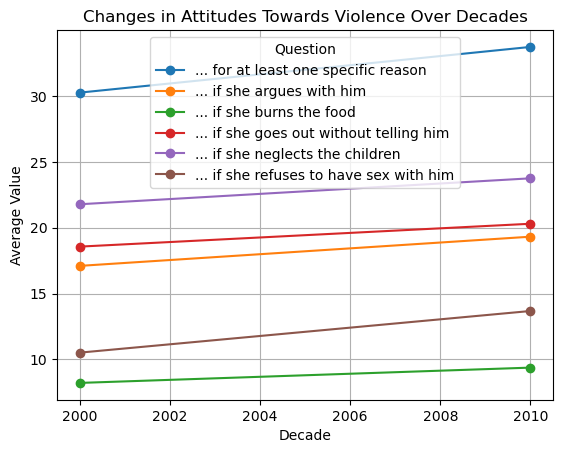

In [17]:
# Extracting the decade
df['Decade'] = (df['Year'] // 10) * 10

# Aggregating data by decade
decade_agg = df.groupby(['Decade', 'Question'])['Value'].mean().unstack()

# Plotting the changes in attitudes over decades
plt.figure(figsize=(12, 8))
decade_agg.plot(kind='line', marker='o')
plt.xlabel('Decade')
plt.ylabel('Average Value')
plt.title('Changes in Attitudes Towards Violence Over Decades')
plt.legend(title='Question')
plt.grid(True)
plt.show()

Distribution of Responses by Gender and Education

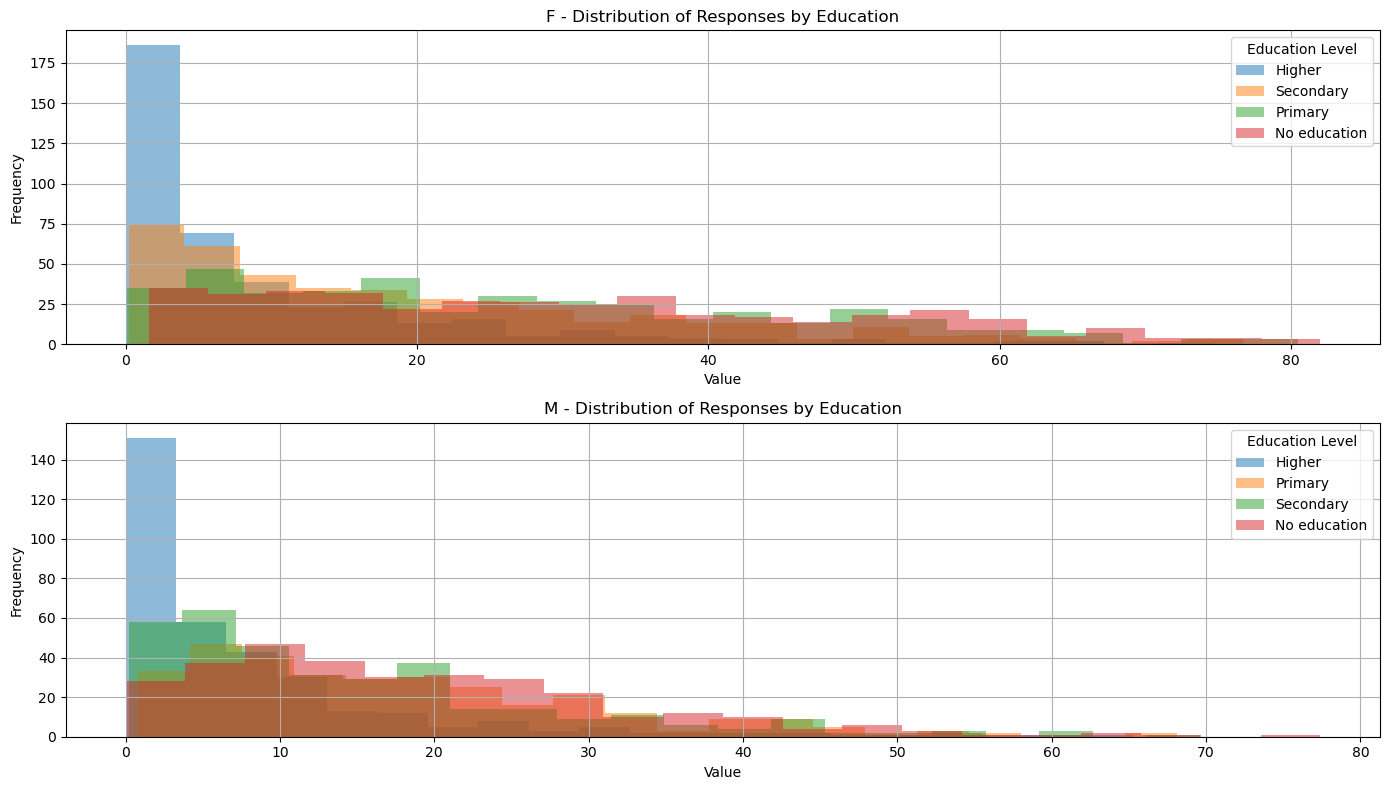

In [21]:
# Filtering data for gender and education
gender_filter = df['Gender'].isin(['M', 'F'])
education_filter = df['Demographics Question'] == 'Education'
filtered_df = df[gender_filter & education_filter]

# Plotting the distribution of responses
plt.figure(figsize=(14, 8))
for gender in filtered_df['Gender'].unique():
    plt.subplot(2, 1, filtered_df['Gender'].unique().tolist().index(gender) + 1)
    gender_data = filtered_df[filtered_df['Gender'] == gender]
    for education in gender_data['Demographics Response'].unique():
        education_data = gender_data[gender_data['Demographics Response'] == education]
        plt.hist(education_data['Value'], bins=20, alpha=0.5, label=education)
    plt.title(f'{gender} - Distribution of Responses by Education')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(title='Education Level')
    plt.grid(True)

plt.tight_layout()
plt.show()

Multi-Factor Analysis: Education and Marital Status

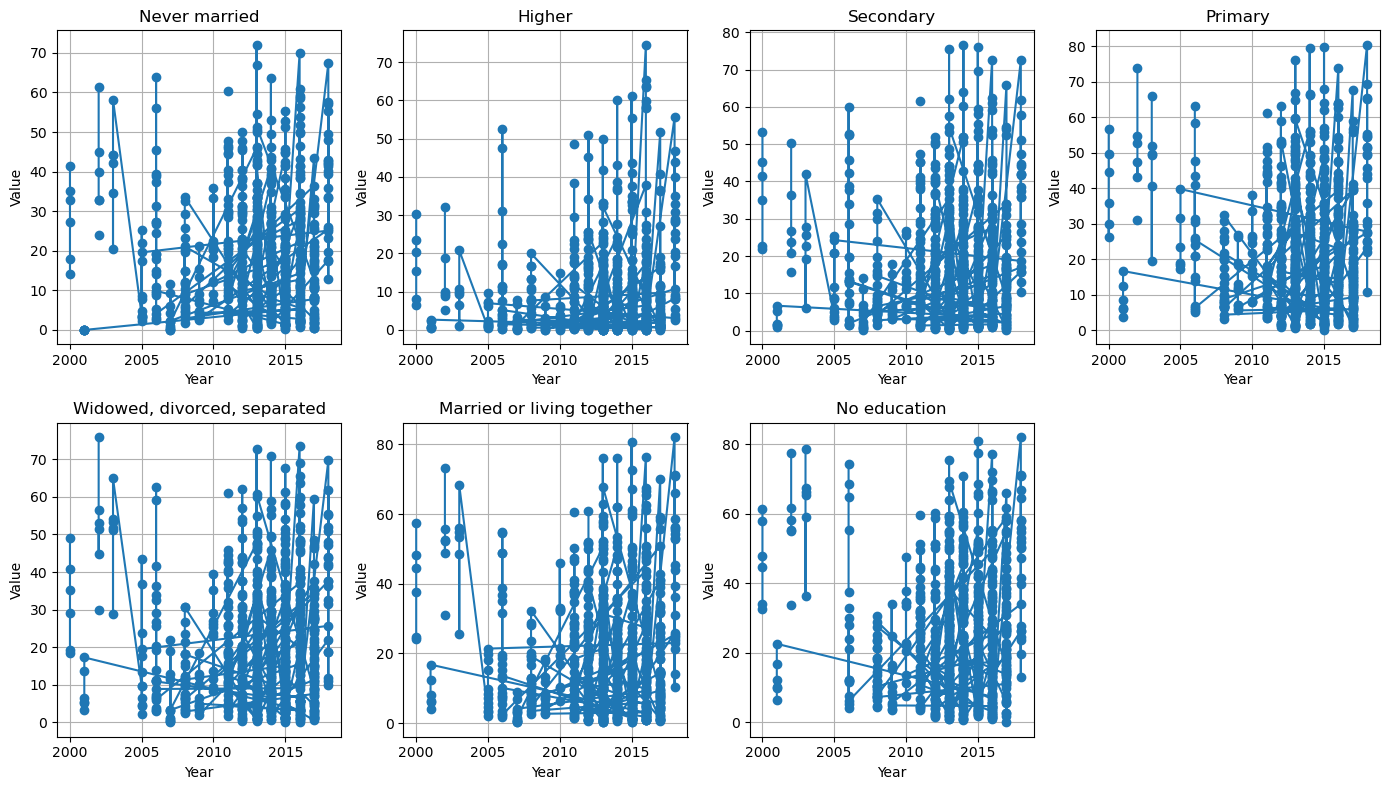

In [24]:
# Filtering data for education and marital status
education_filter = df['Demographics Question'] == 'Education'
marital_status_filter = df['Demographics Question'] == 'Marital status'
filtered_df = df[education_filter | marital_status_filter]

# Plotting the effect of education level and marital status on attitudes
plt.figure(figsize=(14, 8))
for i, response in enumerate(filtered_df['Demographics Response'].unique()):
    plt.subplot(2, (len(filtered_df['Demographics Response'].unique())+1)//2, i+1)
    response_data = filtered_df[filtered_df['Demographics Response'] == response]
    plt.plot(response_data['Year'], response_data['Value'], marker='o')
    plt.title(response)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)

plt.tight_layout()
plt.show()